> 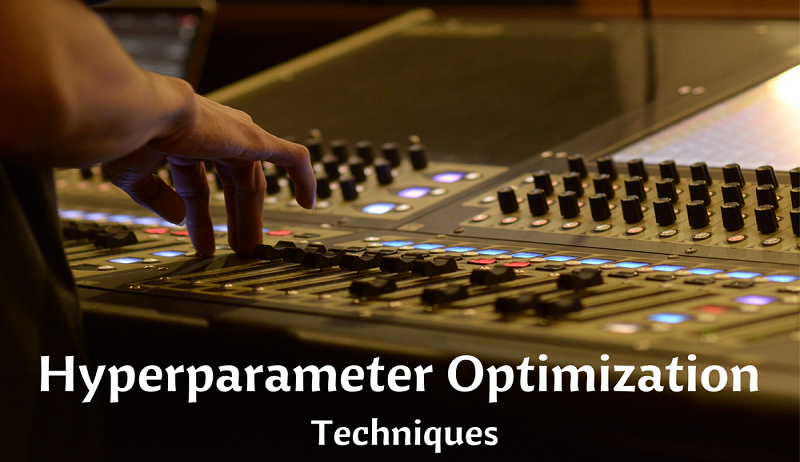
# Table of Content
<ul style="font-size:120%;">
    <li>1. Introduction</li>
    <ul>
   <li>1.1. what is hyperparameter tuning </li>
    <li> 1.2. Need of hyperparameter tuning </li>
    <li> 1.3. Process of hyperparameter tuning </li>
    </ul>
<li>2. Grid search</li>
<li>3. Random search</li>
<li> 4. Bayesian Optimization</li>
<li>5. Genetic Algorithms</li>
<li>6. using Optuna</li>
</ul>

<b>dataset used</b> <br>
breast-cancer-wisconsin-data
*  link-https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
* No of rows-569 
* No of columns-33 

## 1.Introduction
### 1.1 What is hyperparameter tuning
<p style="font-size:120%;">
when we are working on Machine learning problem most often when it comes to Model we don't known the optimal hyperparameter.we should choose the parameter based upon dataset<br>
<b>hyperparameter</b>-whose value is set before the learning process begins.
<br>
<br>
<b>Example</b><br>
• What should be the maximum depth of Decision Tree? <br>
• What should be the number of tree in Random Forest? <br>
• What should be the minimum number of samples at a leaf node of decision tree? <br>

<br>
Model hyperparameter are learned from data and hyper-parameters are tuned to get the best fit.Manual Searching or hit-trail method can be tedious, hence search algorithms like grid searchm,random search & Bayesian Optimization are used.
<p>
 
### 1.2 Need of hyperparameter tuning
<p style="font-size:120%;"> 
• To avoid over-fitting <br>
• To avoid under-fitting <br>

### 1.3 Process of hyperparameter tuning
<p style="font-size:120%;"> 
In model optimization we split the data into three part<br>
• train-train the model on the given parameter<br>
• cv-optimize the model's parameter values<br>
• test-evaluate the optimized model<br>

<br><br>
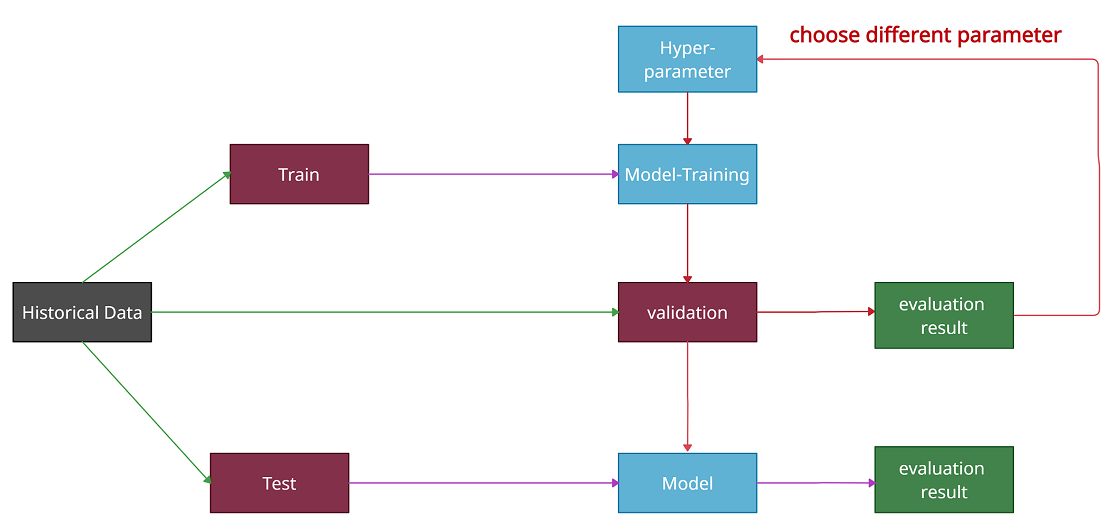

### Data Preparation
<b style="font-size:120%;">importing data</b>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [ ]:
data

In [ ]:
#removing the data
y=data['diagnosis']
data.drop(['id','Unnamed: 32','diagnosis'],axis=1,inplace=True)
x=data
y = y.replace({'M':0,'B':1})

In [ ]:
print(x.shape,y.shape)

<b style="font-size:120%;"> Splitting data into test train</b>

In [ ]:
#### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0, stratify=y)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

## 2.GridSearchCV
<p style="font-size:120%;">
This is a brute-force Mehod.In this techinque we try all the possible hyper-parameter provided.Train and evaluating each model
and selecting the hyper-parameter which produces the best results <br>
<p>
<p style="font-size:120%;">

<b style="font-size:120%;">Important GridSearchCV argument</b><br>
<ul style="font-size:120%;">
    <li><b>Model-</b>Choose the model which you want to pass like-Random forest,decision tree etc<br></li>
    <li><b>param_grid-</b>Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries<br></li>
    <li><b>scoring</b>-Strategy to evaluate the performance of the cross-validated model on the test set<br></li>
    <li><b>n_jobs</b>-Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.<br></li>
    <li><b>cv</b>-Determines the cross-validation splitting strategy. Possible inputs for cv are:</li>
        <ul><li>None, to use the default 5-fold cross validation</li>
        <li>integer, to specify the number of folds in a (Stratified)KFold</li>
        <li>CV splitter</li>
        <li>An iterable yielding (train, test) splits as arrays of indices.</li>
            </ul>
    
</ul>

<p>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

In [ ]:
y_pred=gsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## 3.RandomSearchCV
<p style="font-size:120%;">
Randomized search on hyper parameters.Train and evaluating each model and selecting the hyper parameters which produces the best results
<p>
<p style="font-size:120%;">

<b style="font-size:120%;">Important GridSearchCV argument</b><br>
<ul style="font-size:120%;">
    <li><b>Model-</b>Choose the model which you want to pass like-Random forest,decision tree etc<br></li>
    <li><b>param_grid-</b>Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries<br></li>
    <li><b>scoring</b>-Strategy to evaluate the performance of the cross-validated model on the test set<br></li>
    <li><b>n_jobs</b>-Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.<br></li>
    <li><b>cv</b>-Determines the cross-validation splitting strategy. Possible inputs for cv are:</li>
        <ul><li>None, to use the default 5-fold cross validation</li>
        <li>integer, to specify the number of folds in a (Stratified)KFold</li>
        <li>CV splitter</li>
        <li>An iterable yielding (train, test) splits as arrays of indices.</li>
            </ul>
    
</ul>

<p>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
rsv = RandomizedSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
rsv.fit(x_train,y_train)
print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)

In [ ]:
y_pred=rsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## 4. Bayesian Optimization
<p style="font-size:120%;">
Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.
<ul style="font-size:120%;">
    <li> <b>Objective Function</b>-defines the loss function to minimize.</li>
    <li><b>Domain Space</b> - defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).</li>
    <li><b>Optimization Algorithm</b> - defines the search algorithm to use to select the best input values to use in each new iteration.</li>

</ul>
<b>Library use for hyperopt</b> <br>
https://hyperopt.github.io/hyperopt/
</p>


In [ ]:
%%time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
space = {
    "n_estimators" : hp.choice('n_estimators',[10,11,12,13,14,15,16]),
        "max_depth" : hp.choice('max_depth',[5,10,20,30,40,50,60]),
        "criterion" : hp.choice("criterion",['entropy', 'gini']),
        "min_samples_leaf" : hp.choice("min_samples_leaf",[1, 2, 5, 10]),
        "min_samples_split" : hp.choice("min_samples_split",[2, 5, 10, 15]),
        "max_features" : hp.choice("max_features",['auto', 'sqrt','log2'])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, x_train, y_train, cv =4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

In [ ]:
criterion = {0: 'entropy', 1: 'gini'}
#feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
estimator = {0: '10', 1: '11', 2: '12', 3: '13', 4: '14',5:'15',6:'16'}
max_depth={0:5,1:10,2:20,3:30,4:40,5:50,6:60}
min_samples_leaf={0:1, 1:2, 2:5, 3:10}
min_samples_split={0:2, 1:5, 2:10, 3:15}
max_features={0:'auto', 1:'sqrt',2:'log2'}

In [ ]:
print("criterion",criterion[best['criterion']])
print("n_estimators",estimator[best['n_estimators']])
print("max_depth",max_depth[best['max_depth']])
print("min_samples_leaf",min_samples_leaf[best['min_samples_leaf']])
print("min_samples_split",min_samples_split[best['min_samples_split']])
print("max_features",max_features[best['max_features']])

In [ ]:
random_forest = RandomForestClassifier(criterion ='entropy',
                                       n_estimators = 15,
                                       max_depth = 60, 
                                       min_samples_leaf =1 , 
                                       min_samples_split =5,
                                       max_features='auto'
                                       )
random_forest.fit(x_train,y_train)

In [ ]:
#predictionforest = random_forest.predict(x_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## 5.Genetic Algorithm
<p style="font-size:120%;">
Genetic algorithm use the concept of  process of natural selection,mutation, crossover and selection.<br><br>
In genetic algorithm we take the offspring of best performing models
Let's imagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again calculate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.
use tpot
</p>

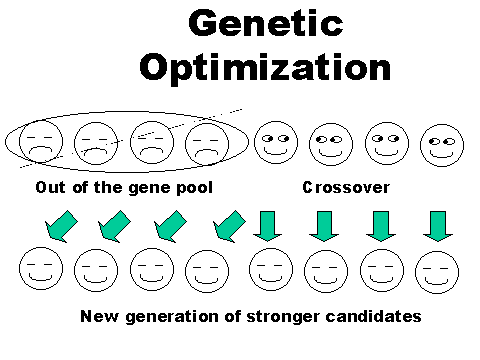

<i>image source-https://mctrans.ce.ufl.edu/featured/TRANSYT-7F/release9/genetic2.gif</i>

In [ ]:
%%time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10,11,12,13,14,15,16]
max_depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']


param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(x_train,y_train)

In [ ]:
y_pred=tpot_classifier.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## 6.Optuna
<p style="font-size:120%;">
Optuna is an automatic hyperparameter optimization framework, particularly designed for machine learning. It features an imperative, define-by-run style user API. Optuna is a framework designed for the automation and the acceleration of the optimization studies.

</p>

In [ ]:

n_estimators = [10,11,12,13,14,15,16]
max_depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']



import optuna
import sklearn.svm
def objective(trial):

    classifier = 'RandomForest'
    
    n_estimators = trial.suggest_int('n_estimators', 10, 17,1)
    max_depth = int(trial.suggest_categorical('max_depth', [5,10,20,30,40,50,60]))
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = int(trial.suggest_categorical('min_samples_leaf',[1, 2, 5, 10]))
    min_samples_split = int(trial.suggest_categorical('min_samples_split', [2, 5, 10, 15]))
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, 
                                                  max_depth=max_depth,
                                                 criterion=criterion,
                                                  min_samples_leaf=min_samples_leaf,
                                                  min_samples_split=min_samples_split,
                                                  max_features=max_features
                                                 )

    return sklearn.model_selection.cross_val_score(
        clf,x_train,y_train, n_jobs=-1, cv=3).mean()

In [ ]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
study.best_params

In [ ]:
rf=RandomForestClassifier(n_estimators= 10,
                         max_depth= 30,
                        criterion= 'entropy',
                         min_samples_leaf= 2,
                         min_samples_split= 2,
                         max_features= 'log2')
rf.fit(x_train,y_train)

In [ ]:
y_pred=rf.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()